### Change Log for K-Means Algorithm

This notebook contains code from [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb) by Jake VanderPlas.

The original notebook preformed K-Means to identify digits, and a K-Means color compression. <br>
In my notebook, I perform K-Means to cluster the iris dataset and perform 16-bit color compression on a distinct image.

#### [1. Understanding the Algorithm](#algorithm-understanding)
- **Objective:**
  - Get an understanding of the K-Means algorithm and how it can seperate data points into k clusteres based on their similarity.
  - Focus on the K-Means algorithm and plot decision boundary to visualise how the algorithm sees them. 

#### [Example 1: K-Means on Iris](#k-means-on-iris)

##### [2. Data Understanding](#data-understanding)
- **Original Description:**
  - In the original notebook, the dataset utilized is the `digits` dataset.
  - The `digits` dataset is a collection of 8x8 pixel images of handwritten digits (0-9).
  - The dataset comprises a total of 1,797  handwritten digits

- **Changes:**
  - In my notebook, I have changed the dataset to the `Iris` dataset.
  - It comprises measurements of sepal length, sepal width, petal length, and petal width for 150 iris flowers.
  - The dataset contains three species: setosa, versicolor, and virginica.
  - Dataset Shape: (150, 4)

##### [3. Data Preparation](#3-data-preparation)
- **Data Cleaning:**
  - No specific data cleaning steps were performed on the iris dataset.

##### [4. Modeling](#modeling)
- **Implementation Details:**
  - Adjusted the number of clusters (k) to 3 for the iris dataset.
  - Plotted the clustered data in 2D with cluster centers for visualization.
  <p float="left">
    <img src="images/irisKMeansClusters.png" width="400" />
  </p>

#### [5. Evaluation](#evaluation)
**Evaluation Metrics:**
- The accuracy metric from sklearn was used to measue the accuracy of this model. 
- Accuracy is a measure of how well the identified clusters match the true labels of the dataset.

**Results:**
- The calculated accuracy for the clustering algorithm on the Iris dataset was 92%.
- This means that clusters assigned by the algorithm closely align with the actual labels of the data points.
- The high accuracy suggests that the K-Means algorithm effectively separated the Iris dataset into distinct clusters corresponding to the different species.

**Confusion Matrix:**
- To provide a more detailed view of the clustering results I generated a confusion matrix

<img src="images/confmat.png" width="400" />



### [Example 2: K-Means for Color Compression](#k-means-on-colour)

##### [2. Data Understanding](#data-understanding-2)
- **Dataset Description:**
  - Utilized a sample image of a flower instead of the digits dataset.
  - The flower image has shape (427, 640, 3), representing the height, width, and RGB channels.

##### [3. Data Preparation](#3-data-preparation-2)
- **Data Cleaning:**
  - No data 

##### [4. Modeling](#modeling-2)
**Implementation Details:**
- Utilized Mini-Batch-KMeans with 16 clusters for color compression.
- Plotted the original and compressed images for comparison.

**Comparison of Original and Modified Notebooks:**
<p float="left">
  <img src="images/16-colour image.png" width="400" />
  <img src="images/16-colour mod.png" width="400" />
</p>
The images above showcase a comparison of the original image and the modified image for k means clustering. 

##### [5. Evaluation](#evaluation-2)
- **Challenges Encountered:**
  - To evaluate the effectiveness of cmy olor compression, I assessed it through visual comparison. The images above showcase the original and compressed versions side by side. This allows visualises how well the color compression algorithm preserved features reducing the number of colors.


In [208]:
# Imports
import matplotlib.pyplot as plt

from scipy.stats import mode
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import load_sample_image
from sklearn.preprocessing import StandardScaler

#### 1. Understanding the Algorithm <a id='algorithm-understanding'></a>

### Example 1: K-Means on Iris Dataset<a id='#k-means-on-iris'></a>

The original dataset was classifing digits using load_digits 

#### 2. Data Understanding <a id='data-understanding'></a>



In [209]:
iris = load_iris()
iris.data.shape

(150, 4)

#### 3. Data Preparation <a id='data-preparation'></a>


#### 4. Modeling <a id='modeling'></a>

In [210]:
# Apply k-means clustering
k = 3

kmeans = KMeans(n_clusters=3, random_state=32)
clusters = kmeans.fit_predict(data_scaled)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(3, 4)

In [211]:
# Initialize labels array
labels = np.zeros_like(clusters)

# Assign labels to clusters based on majority class
for i in range(k):  # 'k' is the number of clusters
    mask = (clusters == i)
    labels[mask] = mode(iris.target[mask])[0]

# Print the assigned labels
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


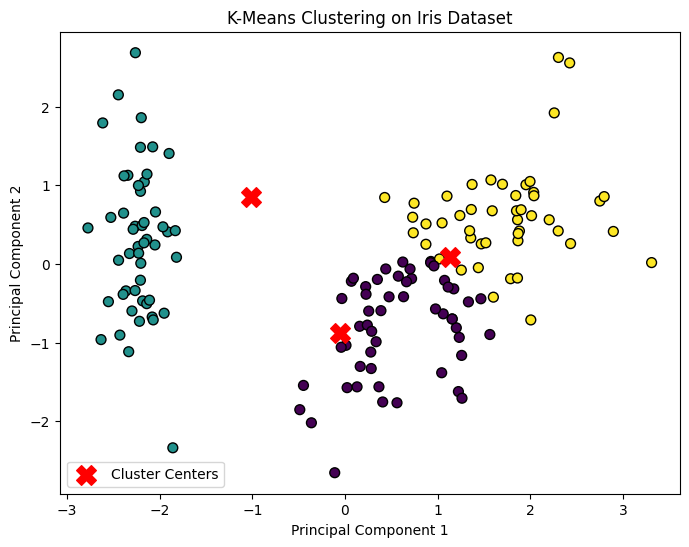

In [212]:
# Plot the clustered data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


#### 5. Evaluation <a id='evaluation'></a>

In [213]:
true_labels = iris.target

# Compare predicted and true labels
accuracy = accuracy_score(true_labels, labels)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 83.33%


In [214]:
from sklearn.metrics import adjusted_rand_score

true_labels = iris.target

# Calculate Adjusted Rand Index
adjusted_rand_index = adjusted_rand_score(true_labels, labels)
print(f'Adjusted Rand Index: {adjusted_rand_index}')


Adjusted Rand Index: 0.6201351808870379


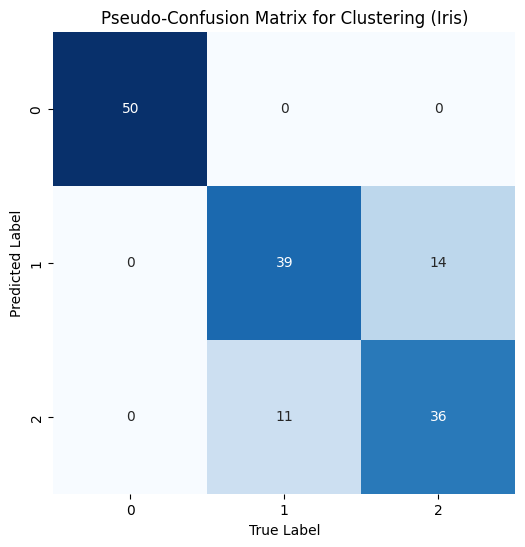

In [215]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'iris.target' contains the true labels
true_labels = iris.target

# Create a pseudo-confusion matrix
mat = confusion_matrix(true_labels, labels)

# Visualize the pseudo-confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=np.unique(true_labels),
            yticklabels=np.unique(labels))
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Pseudo-Confusion Matrix for Clustering (Iris)')
plt.show()


In [216]:

# Project the data using t-SNE
tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0)
iris_proj = tsne.fit_transform(iris.data)

# Compute the clusters
kmeans = KMeans(n_clusters=3, random_state=0)  # Assuming 3 clusters for the Iris dataset
clusters = kmeans.fit_predict(iris_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(3):  # Assuming 3 clusters for the Iris dataset
    mask = (clusters == i)
    labels[mask] = mode(iris.target[mask])[0]

# Compute the accuracy
accuracy = accuracy_score(iris.target, labels)
accuracy

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.92

### Example 2: k-Means for Color Compression

#### 2. Data Understanding <a id='data-understanding-2'></a>

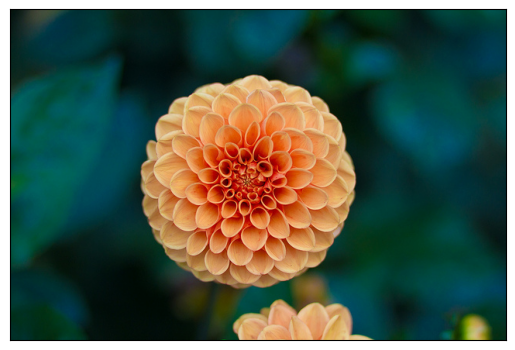

In [217]:
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [218]:
flower.shape

(427, 640, 3)

#### 3. Data Preparation <a id='data-preparation-2'></a>


In [219]:
data = flower / 255.0 
data = data.reshape(-1, 3)
data.shape

(273280, 3)

#### 4. Modeling <a id='modeling-2'></a>

In [220]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.default_rng(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

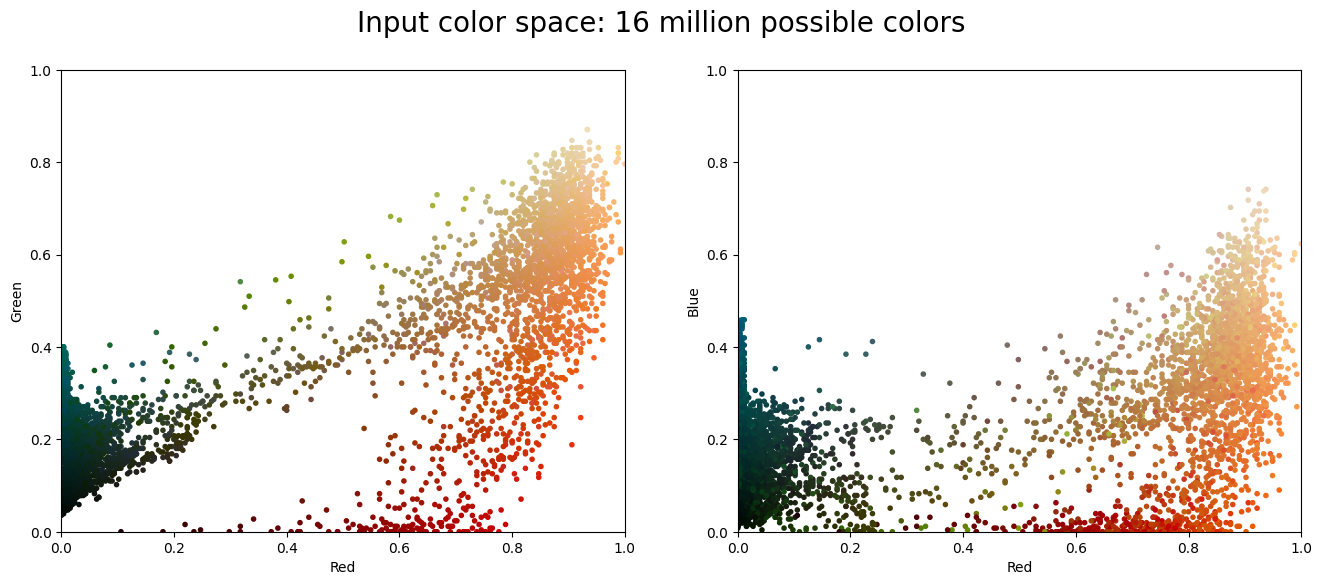

In [221]:
plot_pixels(data, title='Input color space: 16 million possible colors')

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


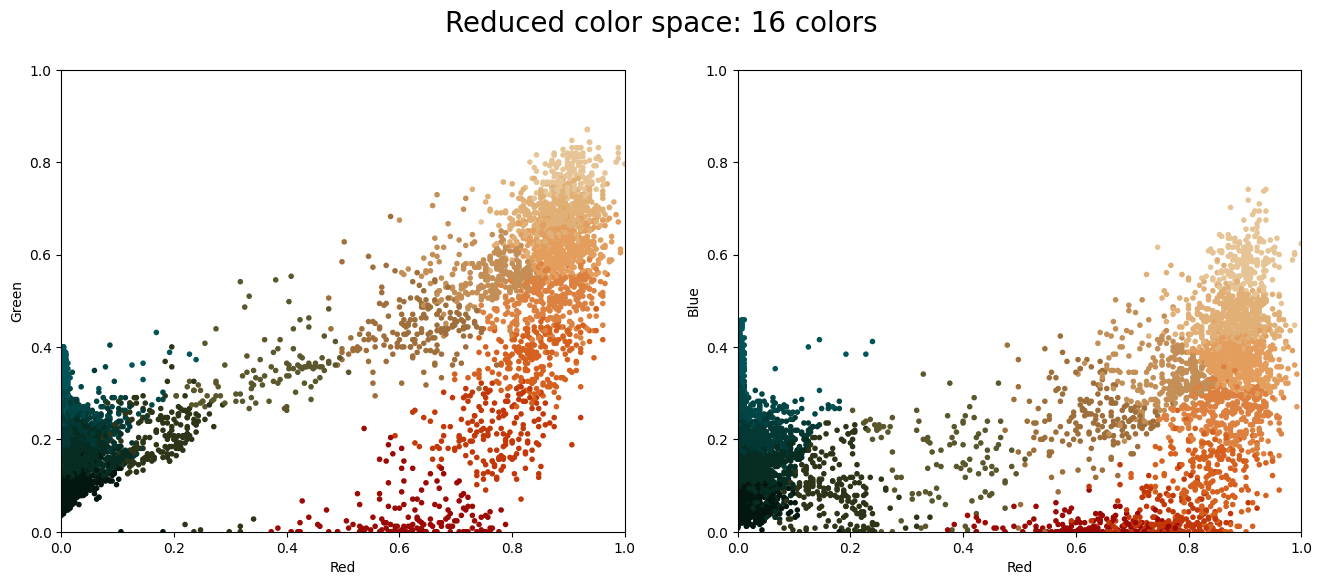

In [222]:
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

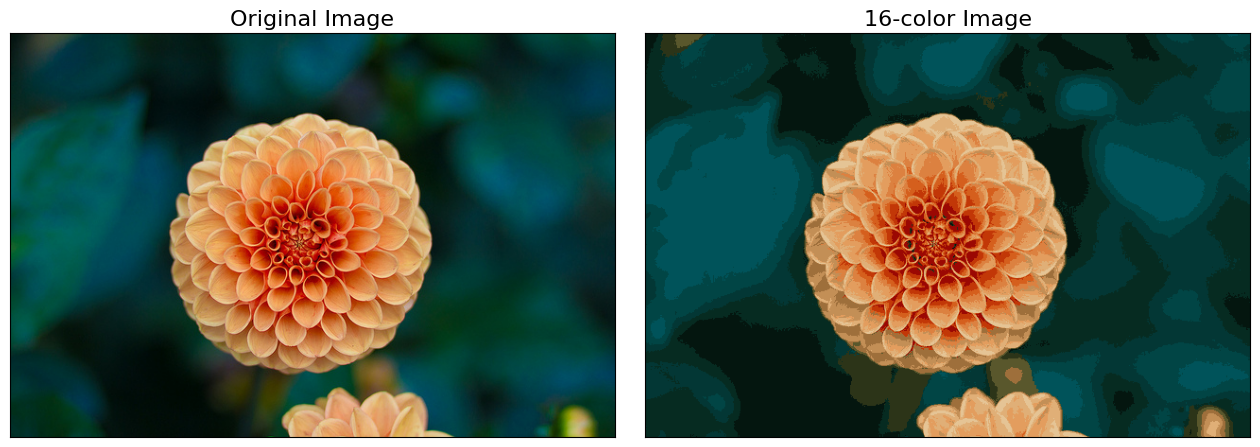

In [223]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

#### 6. Deployment <a id='deployment-2'></a>